# Exercise: Variable scaling

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import seaborn as sns


## Loading a dataset
[Dataset: House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

![column description](https://storage.googleapis.com/kaggle-forum-message-attachments/479761/11440/Screenshot%202019-02-27%20at%205.26.24%20PM.png)

In [3]:
house_data = pd.read_csv('data/kc_house_data.csv',parse_dates=[1])

house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
# zero seems to be a placeholder for missing data in some columns
house_data.apply(lambda _: _.isin([0]).sum(), axis=0)

id                   0
date                 0
price                0
bedrooms            13
bathrooms           10
sqft_living          0
sqft_lot             0
floors               0
waterfront       21450
view             19489
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated     20699
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [5]:
# in the columns, where it makes sense, replacing 0 with NaN
for columns in ['bedrooms', 'bathrooms']:
    house_data.loc[:,columns] = (
        house_data.loc[:,columns]
        .replace(0, np.NaN))

In [6]:
# replace yr_renovated=0 with yr_built value
not_renovated = house_data.yr_renovated == 0
house_data.loc[not_renovated,'yr_renovated'] =(
    house_data.loc[not_renovated, 'yr_built']
)
house_data = house_data.drop(columns=['yr_built'], errors='ignore')

In [7]:
# drop rows with NA
house_data = house_data.dropna(axis=0, how='any')

In [8]:
house_data.loc[:,'basement_ratio'] = house_data.sqft_basement/house_data.sqft_living
house_data = house_data.drop(columns=['sqft_above', 'sqft_basement'], errors='ignore')

In [9]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21597 non-null  int64         
 1   date            21597 non-null  datetime64[ns]
 2   price           21597 non-null  float64       
 3   bedrooms        21597 non-null  float64       
 4   bathrooms       21597 non-null  float64       
 5   sqft_living     21597 non-null  int64         
 6   sqft_lot        21597 non-null  int64         
 7   floors          21597 non-null  float64       
 8   waterfront      21597 non-null  int64         
 9   view            21597 non-null  int64         
 10  condition       21597 non-null  int64         
 11  grade           21597 non-null  int64         
 12  yr_renovated    21597 non-null  int64         
 13  zipcode         21597 non-null  int64         
 14  lat             21597 non-null  float64       
 15  lo

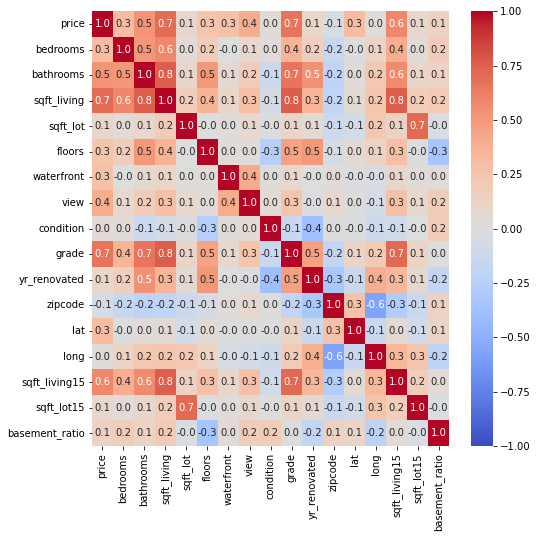

In [10]:
sns.heatmap(house_data.drop(columns=['id']).corr(),
            vmin=-1, vmax=1,
            annot=True, fmt=".1f", cmap='coolwarm')
plt.gcf().set_size_inches(8,8)

## Task
You want to use this data to predict house prices. You decide to start with a simple [linear regression model with parameters estimated via the least-squares method](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html).
Under this model, for each sample $i$ you have:
$$y_i  = \beta_0 + \beta_1 {\bf x_i}^{(1)} + \cdots + \beta_n {\bf x_i}^{(n)} + \epsilon$$

Relating these variables to your dataframe, you have that:
- The target variable $y_i$ that you want to predict is `price`.
- The variables  ${\bf x}_i$ correspond to the other columns in the data frame. They can be used as features (aka. predictors)  in your task. Those form your data matrix $X$ (aka design matrix)

In addition:
- $\beta_i$ are your regression coeficients, that will be estimated from data.
- $\epsilon$ is and additive error term

### Preparing your training data



In [118]:
# data = house_data.drop(columns=['id', 'date'])
# data = house_data.filter(items=['price', 'sqft_living', 'waterfront', 'view'])
data = house_data.filter(
    items=['price', 'sqft_living', 'view', 'condition', 'zipcode'])
X = data.drop(columns=['price'])
y = data.price

X.shape

(21597, 4)

### Fitting a model
We are going to use an implementation from Scikit-learn to fit our linear model:

In [119]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Here is the R² coefficient of the regression computed on the points used to fit its coefficients (the points in the training set):

In [120]:
model.score(X, y)

0.5428098049982084

In [121]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence

# fit the regression model using statsmodels library
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.854
Method:                 Least Squares   F-statistic:                          3.168e+04
Date:                Tue, 11 Apr 2023   Prob (F-statistic):                        0.00
Time:                        00:10:18   Log-Likelihood:                     -2.9901e+05
No. Observations:               21597   AIC:                                  5.980e+05
Df Residuals:                   21593   BIC:                                  5.981e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   258.2016      1.932    133.657      0.000     254.415     261.988
view         1.008e+05   2313.260     43.596      0.000    9.63e+04    1.05e+05
condition    3.643e+04   2617.025     13.922      0.000    3.13e+04    4.16e+04
zipcode        -1.4763      0.103    -14.305      0.000      -1.679      -1.274
==============================================================================
Omnibus:                    14289.680   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           567931.132
Skew:                           2.644   Prob(JB):                         0.00
Kurtosis:                      27.559   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
# calculate the cooks_distance - the OLSInfluence object contains multiple influence measurements
influence = OLSInfluence(results)
cook_dist, p_value = influence.cooks_distance
leverage = influence.hat_matrix_diag
resid_studentized = influence.resid_studentized_internal

In [125]:
from scipy.stats import f as fdist
is_out = cook_dist > 4/X.shape[0]
is_out = cook_dist > fdist.pdf(0.5, dfn=X.shape[1], dfd=X.shape[0]-X.shape[1])
is_out = cook_dist > 4*(X.shape[0]-X.shape[1])/X.shape[1]

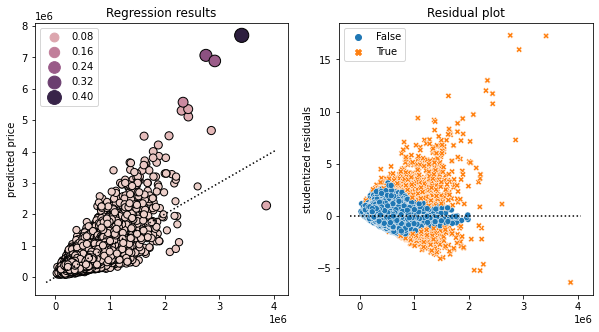

In [126]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax = axs[0]
ax.set_title('Regression results')
sns.scatterplot(data=data, x=results.fittedvalues, y='price',
                ax=ax,
                hue=cook_dist, size=cook_dist, sizes=(50, 200), 
                edgecolor='black', linewidth=1)
ax.set_ylabel('predicted price')
ax.plot(ax.get_xlim(), ax.get_xlim(), ':k')
ax = axs[1]
ax.set_title('Residual plot')
sns.scatterplot(data=data, x=results.fittedvalues, y=resid_studentized, 
                ax=ax,
                hue=is_out, style=is_out)

ax.set_ylabel('studentized residuals')
ax.plot(ax.get_xlim(), [0,0], ':k')
plt.show()

## Problem
Your model was not really well adapted to your data, as indicated by your R² coefficients. The closer the value is to one, the better fit your model was.

A linear model assumes that the errors $\epsilon$ will be normaly distributed with mean zero. If the mean of erros was zero, the relationship between predicted prices and real prices would be centered on the 45 degree dashed line.

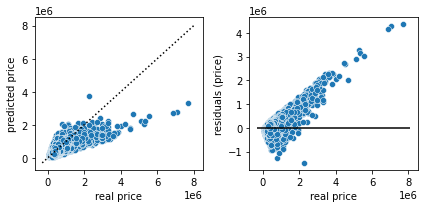

In [60]:
predictions = model.predict(X)  # compute model predictions
residuals = y - predictions 

fig, axs = plt.subplots(1,2, figsize=(6,3))
ax = axs[0]
sns.scatterplot(x=y, y=predictions, ax=ax)
ax.plot(ax.get_xlim(), ax.get_xlim(), ':k')
ax.set_xlabel('real price')
ax.set_ylabel('predicted price')

ax = axs[1]
sns.scatterplot(x=y, y=residuals, ax=ax)
ax.hlines(0, *ax.get_xlim(), colors=['k'])
ax.set_xlabel('real price')
ax.set_ylabel('residuals (price)')
fig.tight_layout()


In [18]:
residuals.describe()

count    2.159700e+04
mean    -1.064546e-08
std      2.037734e+05
min     -1.221359e+06
25%     -1.012382e+05
50%     -1.122584e+04
75%      7.789000e+04
max      4.426360e+06
Name: price, dtype: float64


If we plot the histogram of errors, we see their distribution is not normal and heavy tailed to the left:

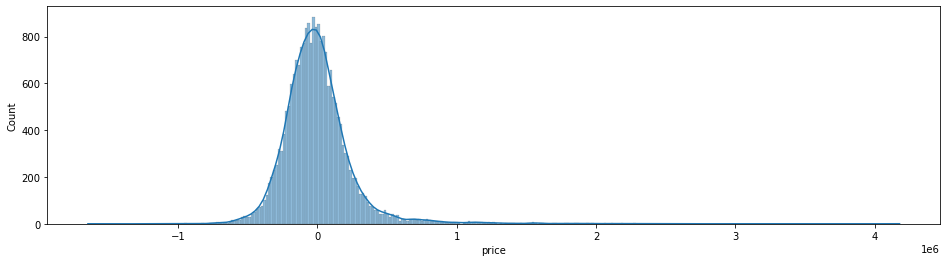

In [52]:
sns.histplot(x=residuals, kde=True)
plt.gcf().set_size_inches(16,4)

If the relationship between predictors and target is linear, they should have similar distributions (up to a linear transformation). The presence of outliers, among other factors, may violate this assumption.

## Your turn

One common solution to this problem is to apply the different outlier handling techniques we just saw to the target regression variable so that residuals better comply with the normality assumption.


Scikit-learn proposes some implementation of some transforms we saw in the course. An [article comparing the methods on features having outliers is available](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html). Among these you can find:
- The Box-Cox transoformation that can be done using the [PowerTransformer](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#powertransformer)
- Winsorizing that can be achieved using [QuantileTransformer](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#quantiletransformer-uniform-output)

## Transforming target variable

### Robust scaler

In [128]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import RobustScaler


model2 = make_pipeline(
    StandardScaler(),
    TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=RobustScaler()
    )
)


model2.fit(X, y)
model2.score(X, y)

0.5428098049982084

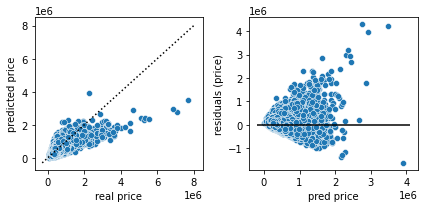

In [129]:
predictions = model2.predict(X)  # compute model predictions
residuals = y - predictions 

fig, axs = plt.subplots(1,2, figsize=(6,3))
ax = axs[0]
sns.scatterplot(x=y, y=predictions, ax=ax)
ax.plot(ax.get_xlim(), ax.get_xlim(), ':k')
ax.set_xlabel('real price')
ax.set_ylabel('predicted price')

ax = axs[1]
sns.scatterplot(x=predictions, y=residuals, ax=ax)
ax.hlines(0, *ax.get_xlim(), colors=['k'])
ax.set_xlabel('pred price')
ax.set_ylabel('residuals (price)')
fig.tight_layout()


### Quantile transformer

In [130]:
from sklearn.preprocessing import QuantileTransformer


model_quant = make_pipeline(
    StandardScaler(),
    TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=QuantileTransformer(output_distribution='normal')
    )
)


model_quant.fit(X, y)
model_quant.score(X, y)

0.19203735160201008

c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but QuantileTransformer was fitted without feature names
  warnings.warn(


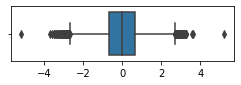

In [131]:
rescaled_prices = model_quant.steps[1][1].transformer_.transform(pd.DataFrame(y)).squeeze()
sns.boxplot(x=rescaled_prices, orient='horiz')
plt.gcf().set_size_inches(4,1)

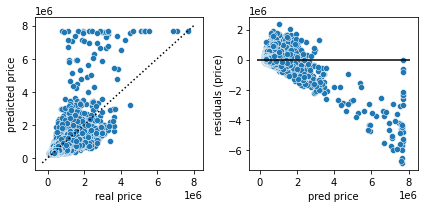

In [132]:
predictions = model_quant.predict(X)  # compute model predictions
residuals = y - predictions 

fig, axs = plt.subplots(1,2, figsize=(6,3))
ax = axs[0]
sns.scatterplot(x=y, y=predictions, ax=ax)
ax.plot(ax.get_xlim(), ax.get_xlim(), ':k')
ax.set_xlabel('real price')
ax.set_ylabel('predicted price')

ax = axs[1]
sns.scatterplot(x=predictions, y=residuals, ax=ax)
ax.hlines(0, *ax.get_xlim(), colors=['k'])
ax.set_xlabel('pred price')
ax.set_ylabel('residuals (price)')
fig.tight_layout()


### Power transformer

In [133]:
from sklearn.preprocessing import PowerTransformer


model_pwr = make_pipeline(
    StandardScaler(),
    TransformedTargetRegressor(
    transformer=PowerTransformer(standardize=False)
    )
)


model_pwr.fit(X, y)
model_pwr.score(X, y)

ValueError: Input contains NaN.

In [ ]:
rescaled_prices = model_pwr.steps[1][1].transformer_.transform(pd.DataFrame(y)).squeeze()
sns.boxplot(x=rescaled_prices, orient='horiz')
plt.gcf().set_size_inches(4,1)

In [ ]:
predictions = model_pwr.predict(X)  # compute model predictions
residuals = y - predictions 

fig, axs = plt.subplots(1,2, figsize=(6,3))
ax = axs[0]
sns.scatterplot(x=y, y=predictions, ax=ax)
ax.plot(ax.get_xlim(), ax.get_xlim(), ':k')
ax.set_xlabel('real price')
ax.set_ylabel('predicted price')

ax = axs[1]
sns.scatterplot(x=predictions, y=residuals, ax=ax)
ax.hlines(0, *ax.get_xlim(), colors=['k'])
ax.set_xlabel('pred price')
ax.set_ylabel('residuals (price)')
fig.tight_layout()


## Model coefs

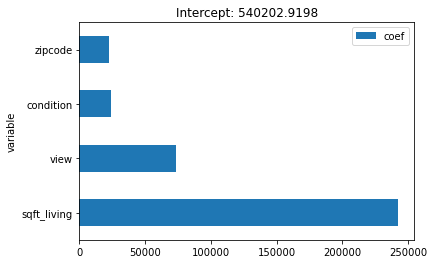

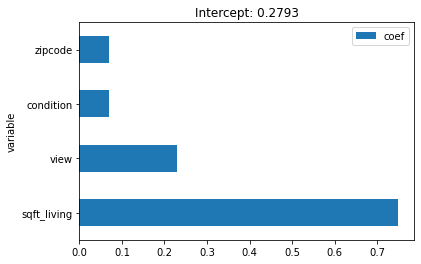

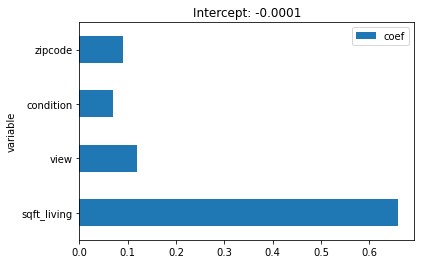

In [134]:
estimators = [
    model.steps[1][1], 
    model2.steps[1][1].regressor_,
    model_quant.steps[1][1].regressor_
]
for estim in estimators:
    df = pd.DataFrame(
        data=dict(coef=estim.coef_.round(2),
                  variable=X.columns)
    )
    df.plot(kind='barh', y='coef', x='variable')
    plt.title(f'Intercept: {estim.intercept_:0.4f}')
